In [2]:
import xarray as xr
import numpy as np

ds = xr.open_dataset('/content/igrf_declination_inclination_data.nc')
emag = xr.open_dataset('/content/interpolated_emag_from_csv.nc')

dec = ds['igrf_D']
inc = ds['igrf_I']
lat = ds['lat']
lon = ds['lon']

flat_dec = np.asarray(dec).flatten()
flat_inc = np.asarray(inc).flatten()

flat_lat = np.asarray(lat).flatten()
flat_lon = np.asarray(lon).flatten()

print(flat_dec)
print(flat_inc)

print(flat_lat)
print(flat_lon)

[151.04797316 150.94873555 150.84950199 ... 135.80689422 135.90598302
 136.00511631]
[-74.0491164  -74.04867942 -74.04824014 ...  88.33813648  88.33827228
  88.33840661]
[   0    1    2 ... 1583 1584 1585]
[   0    1    2 ... 3747 3748 3749]


In [3]:
pro_dec_ds =  xr.DataArray(dec , dims=['lat','lon'], coords= {'lat': emag['lat'].values.flatten(), 'lon': emag['lon'].values.flatten()})
pro_inc_ds =  xr.DataArray(inc , dims=['lat','lon'], coords= {'lat': emag['lat'].values.flatten(), 'lon': emag['lon'].values.flatten()})

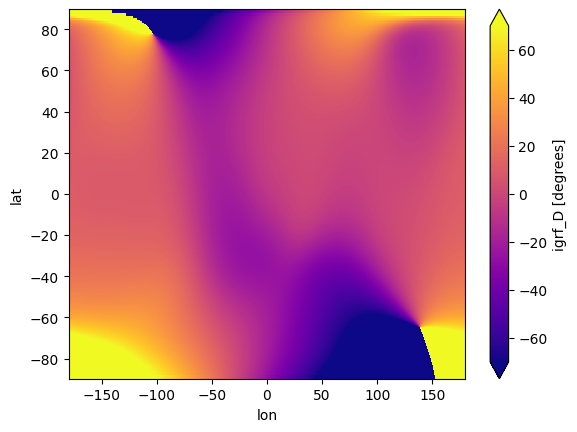

In [4]:
pro_dec_ds.plot(vmin=-70, vmax = 70, cmap='plasma')

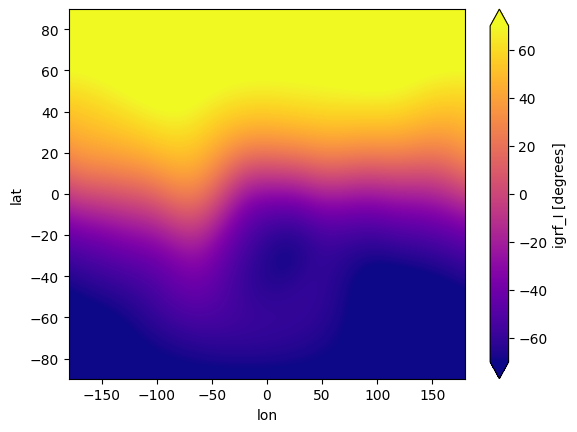

In [5]:
pro_inc_ds.plot(vmin=-70, vmax = 70, cmap='plasma')

In [6]:
pro_dec_ds.to_netcdf('/content/IGRF_dec_grid.nc')
pro_inc_ds.to_netcdf('/content/IGRF_inc_grid.nc')